In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
seed = 123
data = pd.read_csv('Occupancy_Estimation.csv')

In [3]:
data.head()

Date      Time  S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  \
0  2017/12/22  10:49:41    24.94    24.75    24.56    25.38       121   
1  2017/12/22  10:50:12    24.94    24.75    24.56    25.44       121   
2  2017/12/22  10:50:42    25.00    24.75    24.50    25.44       121   
3  2017/12/22  10:51:13    25.00    24.75    24.56    25.44       121   
4  2017/12/22  10:51:44    25.00    24.75    24.56    25.44       121   

   S2_Light  S3_Light  S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound  \
0        34        53        40      0.08      0.19      0.06      0.06   
1        33        53        40      0.93      0.05      0.06      0.06   
2        34        53        40      0.43      0.11      0.08      0.06   
3        34        53        40      0.41      0.10      0.10      0.09   
4        34        54        40      0.18      0.06      0.06      0.06   

   S5_CO2  S5_CO2_Slope  S6_PIR  S7_PIR  Room_Occupancy_Count  
0     390      0.769231       0       0                     1  
1     390      0.646154       0       0                     1  
2     390      0.519231       0       0                     1  
3     390      0.388462       0       0                     1  
4     390      0.253846       0       0                     1

In [4]:
data.shape

(10129, 19)

In [5]:
data = data.drop(['Date', 'Time'], axis=1)

In [6]:
X = data.drop([ 'Room_Occupancy_Count'], axis=1)
lbls = data['Room_Occupancy_Count']

Text(0.5, 1.0, 'Data distribution in classes')

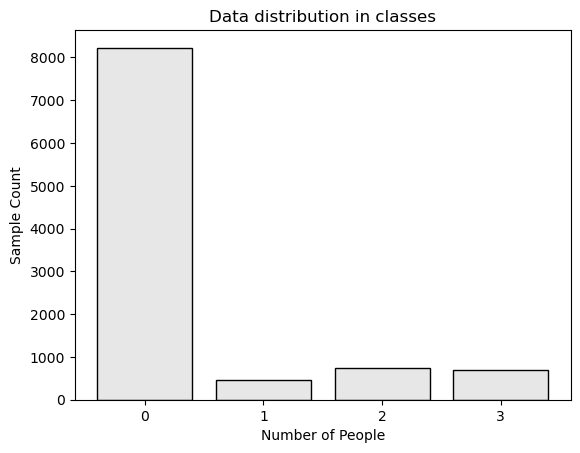

In [32]:
counts = np.unique(lbls, return_counts=True)
plt.bar(counts[0], counts[1], color=(0.1, 0.1, 0.1, 0.1),  edgecolor='black')
plt.xticks(counts[0])
plt.xlabel("Number of People")
plt.ylabel("Sample Count")
plt.title("Data distribution in classes")

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, lbls, test_size=0.3, random_state=seed, stratify=lbls)


In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(7090, 16)
(3039, 16)
(7090,)
(3039,)


<AxesSubplot:xlabel='Room_Occupancy_Count', ylabel='Count'>

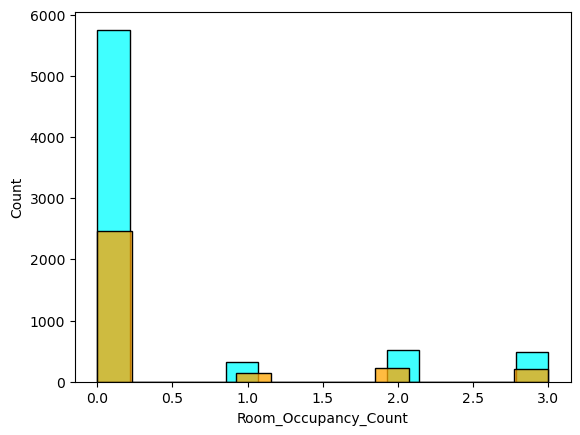

In [9]:
sns.histplot(y_train, color="cyan")
sns.histplot(y_test, color="orange")

In [10]:

X_train.to_csv("data/original/original_x_train.csv", index=False)
X_test.to_csv("data/original/original_x_test.csv", index=False)
y_train.to_csv("data/original/original_y_train.csv", index=False)
y_test.to_csv("data/original/original_y_test.csv", index=False)

In [66]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LogisticRegression

In [99]:


# evaluate the model
def cv_score(model, x, y, seed=123, kfold=10):
    cv = KFold(n_splits=kfold, shuffle=True, random_state=seed)
    from sklearn.metrics import make_scorer, f1_score
    f1_score = {'f1_score' : make_scorer(f1_score, average='macro')}
    scores_ = cross_validate(model, x, y, scoring=f1_score, cv=cv, n_jobs=-1)
    print(scores_)
    scores = scores_['test_f1_score']
    f1 = np.mean(scores)
    error = np.std(scores)/np.sqrt(len(scores))

    plt.plot(range(kfold), scores, color="grey", label="accuracy")
    plt.errorbar(range(kfold), scores, yerr=error, fmt='o', color="red")
    plt.ylabel("F1 Score")
    plt.xlabel("Fold")
    plt.title("Cross-validation results with error(std. error) bar \n Standard Error = %f \n Mean F1 = %f"%(error, f1))
    plt.legend()
    plt.show()
    return f1

/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

{'fit_time': array([0.3406589 , 0.65941691, 0.58408189, 0.59534621, 0.61845613,
       0.56341124, 0.59382296, 0.56959987, 0.33508301, 0.54895186]), 'score_time': array([0.00257301, 0.00350118, 0.00762701, 0.00517368, 0.00312877,
       0.00485301, 0.0038929 , 0.00443697, 0.00277781, 0.00346017]), 'test_f1_score': array([0.93230654, 0.92052502, 0.9258886 , 0.93010483, 0.96059056,
       0.90885002, 0.92429392, 0.91492441, 0.89410803, 0.92419697])}


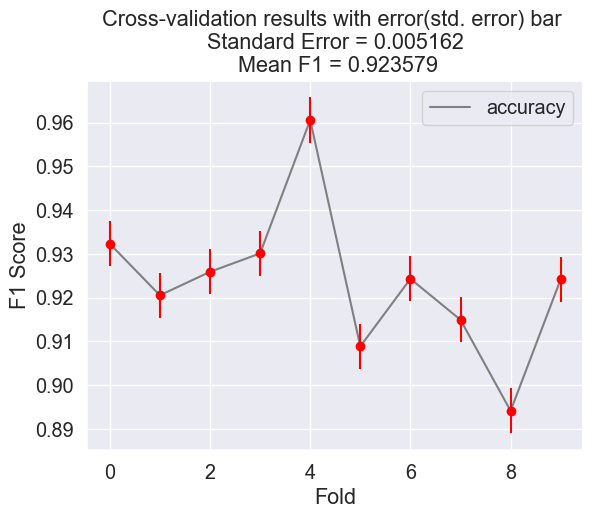

0.9235788900069473

In [100]:
# get the model
model = LogisticRegression()
cv_score(model, X, lbls)

In [50]:
X.describe(include='all')

S1_Temp       S2_Temp       S3_Temp       S4_Temp      S1_Light  \
count  10129.000000  10129.000000  10129.000000  10129.000000  10129.000000   
mean      25.454012     25.546059     25.056621     25.754125     25.445059   
std        0.351351      0.586325      0.427283      0.356434     51.011264   
min       24.940000     24.750000     24.440000     24.940000      0.000000   
25%       25.190000     25.190000     24.690000     25.440000      0.000000   
50%       25.380000     25.380000     24.940000     25.750000      0.000000   
75%       25.630000     25.630000     25.380000     26.000000     12.000000   
max       26.380000     29.000000     26.190000     26.560000    165.000000   

          S2_Light      S3_Light      S4_Light      S1_Sound      S2_Sound  \
count  10129.00000  10129.000000  10129.000000  10129.000000  10129.000000   
mean      26.01629     34.248494     13.220259      0.168178      0.120066   
std       67.30417     58.400744     19.602219      0.316709      0.266503   
min        0.00000      0.000000      0.000000      0.060000      0.040000   
25%        0.00000      0.000000      0.000000      0.070000      0.050000   
50%        0.00000      0.000000      0.000000      0.080000      0.050000   
75%       14.00000     50.000000     22.000000      0.080000      0.060000   
max      258.00000    280.000000     74.000000      3.880000      3.440000   

           S3_Sound      S4_Sound        S5_CO2  S5_CO2_Slope        S6_PIR  \
count  10129.000000  10129.000000  10129.000000  10129.000000  10129.000000   
mean       0.158119      0.103840    460.860401     -0.004830      0.090137   
std        0.413637      0.120683    199.964940      1.164990      0.286392   
min        0.040000      0.050000    345.000000     -6.296154      0.000000   
25%        0.060000      0.060000    355.000000     -0.046154      0.000000   
50%        0.060000      0.080000    360.000000      0.000000      0.000000   
75%        0.070000      0.100000    465.000000      0.000000      0.000000   
max        3.670000      3.400000   1270.000000      8.980769      1.000000   

             S7_PIR  
count  10129.000000  
mean       0.079574  
std        0.270645  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

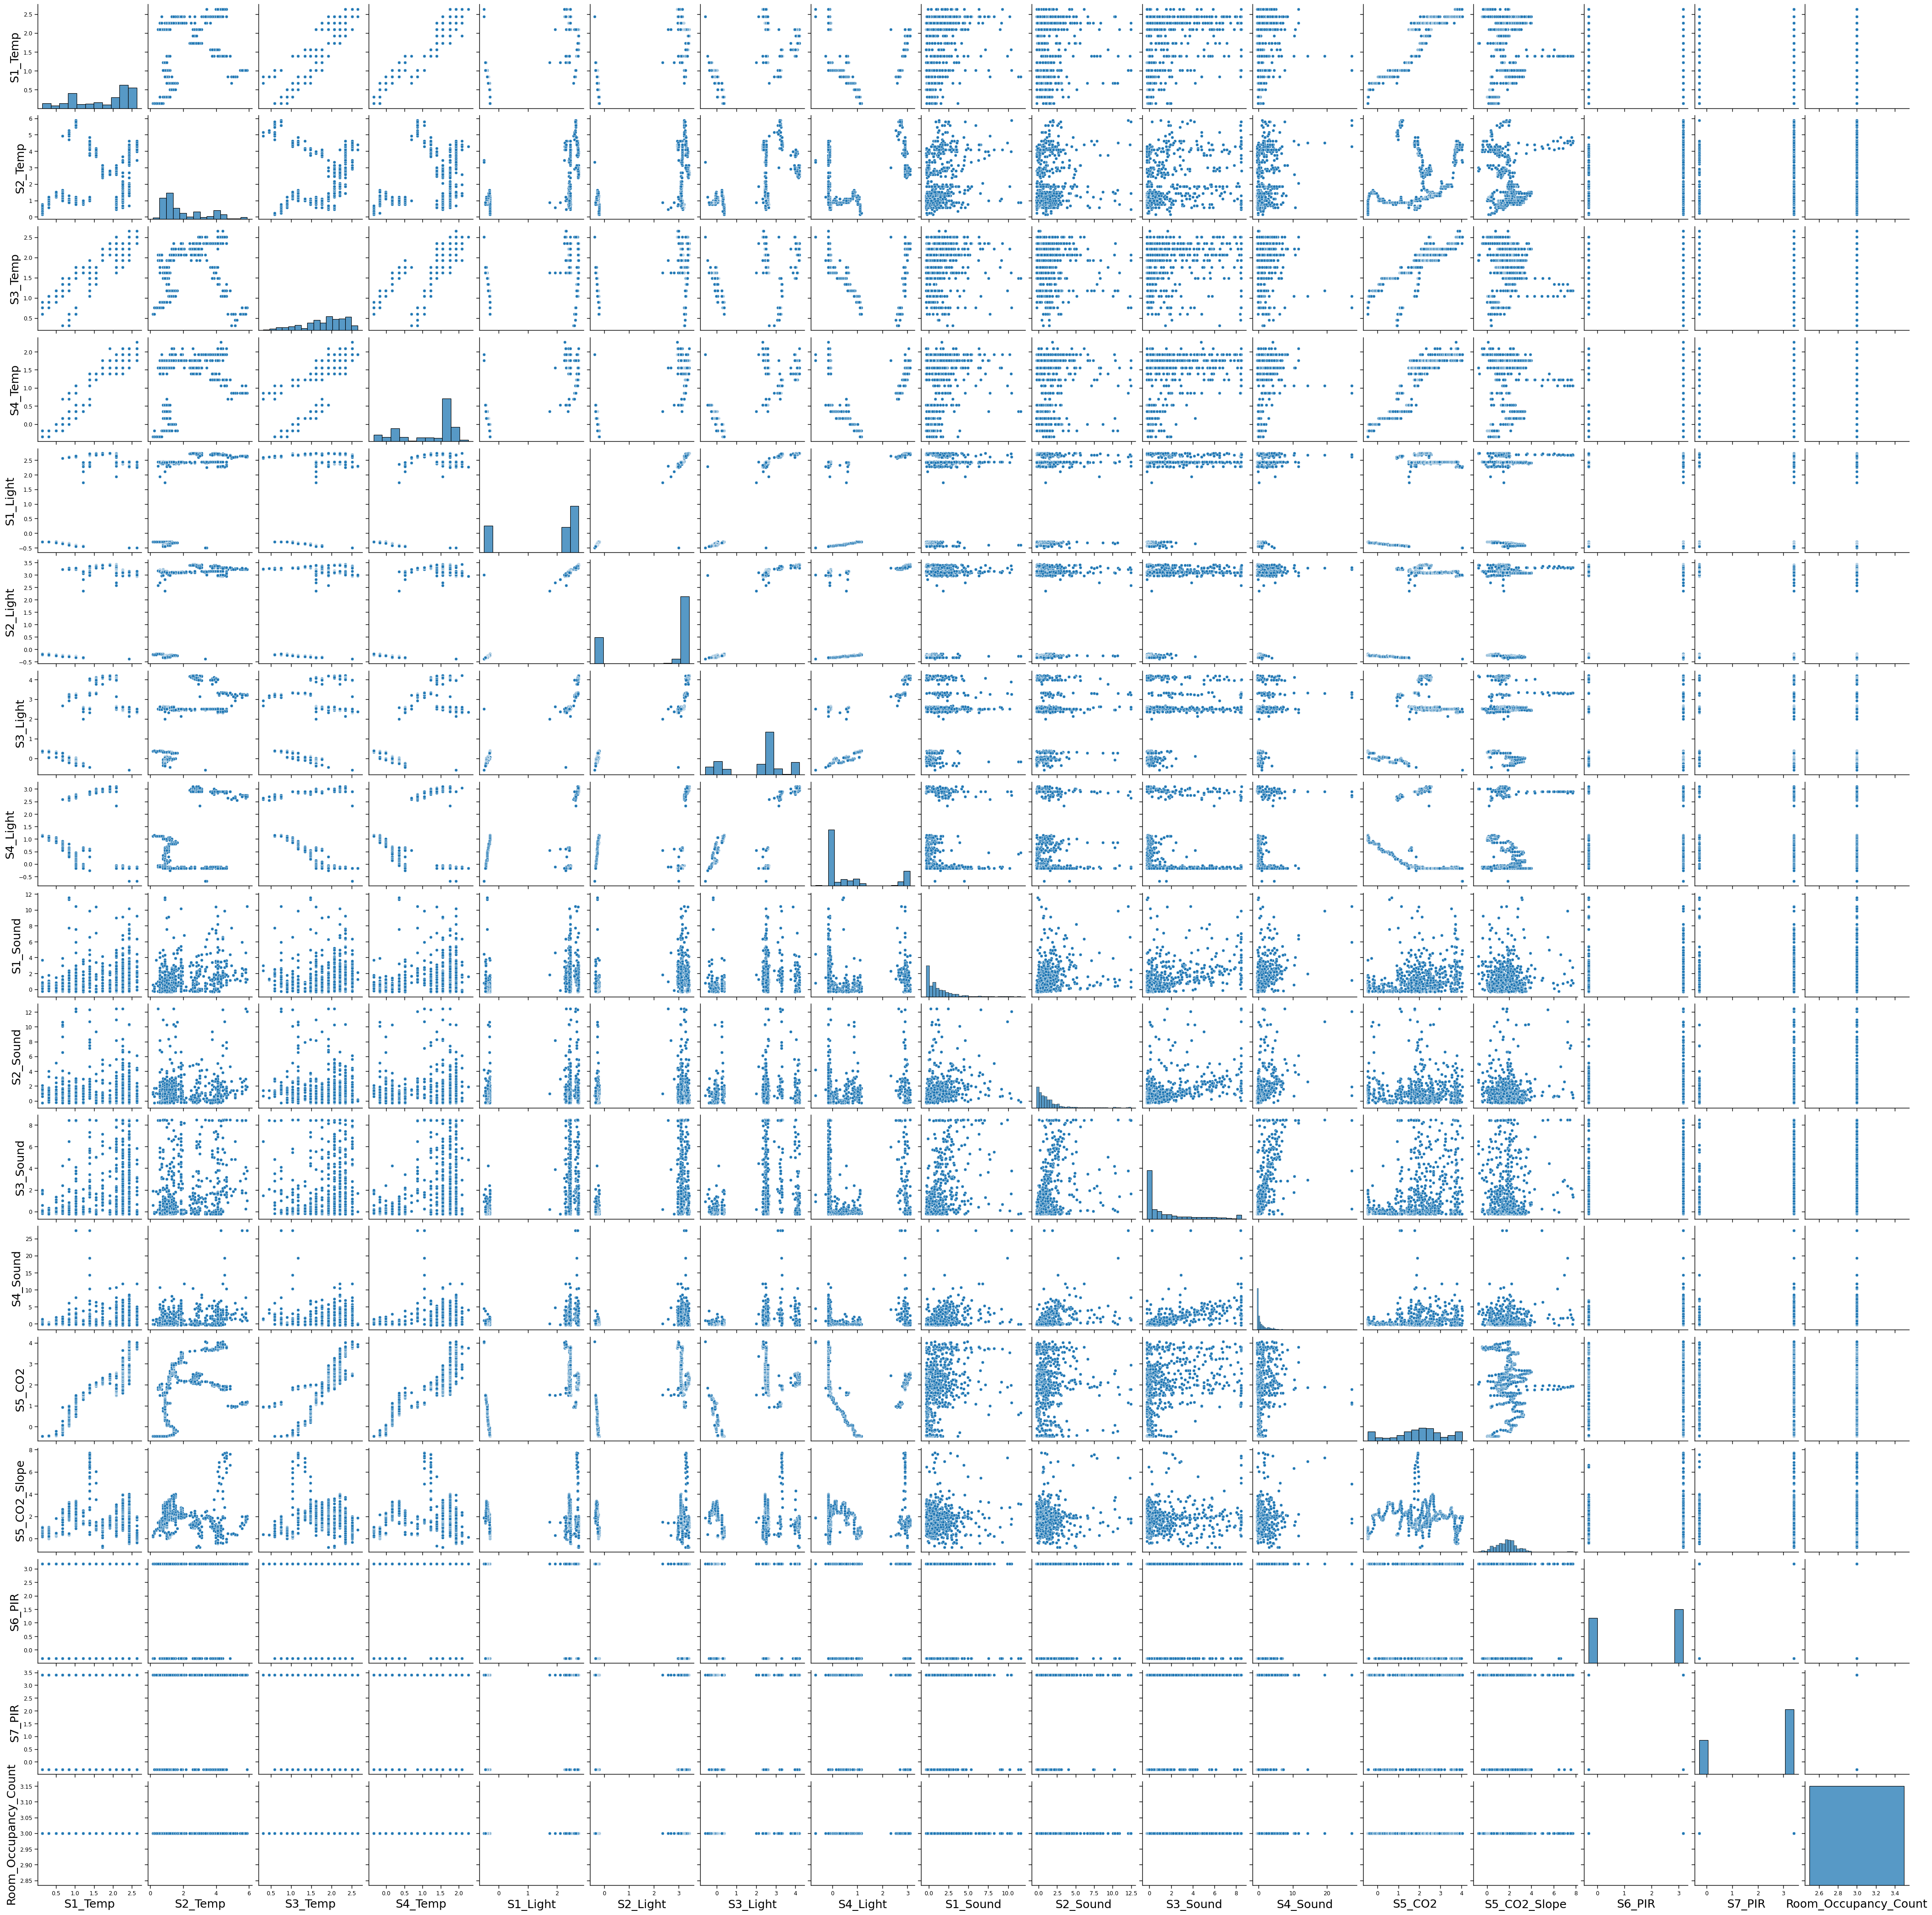

In [202]:
data[data['Room_Occupancy_Count']==3].describe()
sns.set_context("paper", rc={"axes.labelsize":18})
sns.pairplot(data[data['Room_Occupancy_Count']==3])

In [48]:
# print("Null value counts: ")
# X.isna().sum()

<AxesSubplot:>

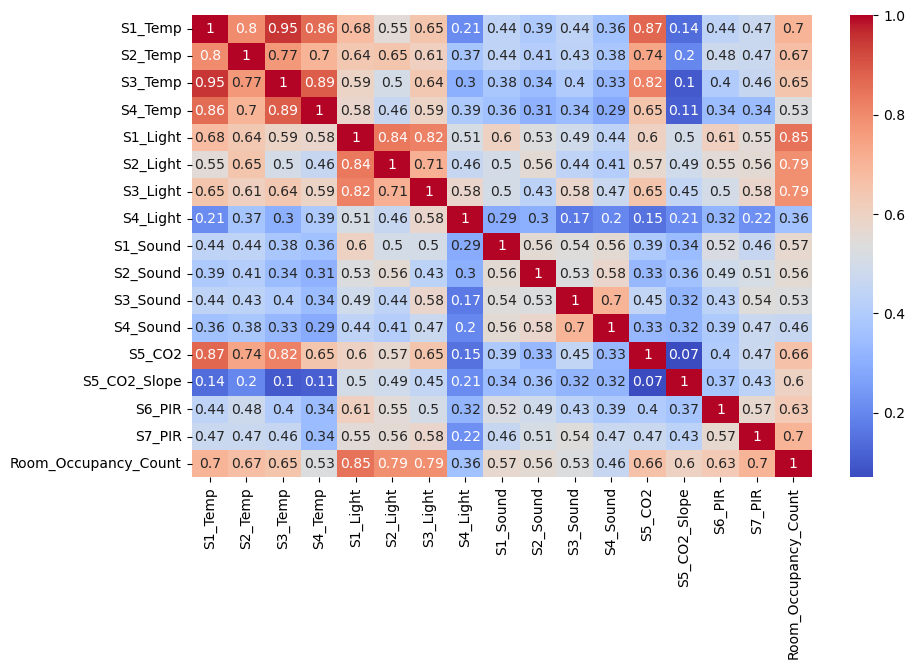

In [39]:
corr_matrix = data.corr(method = 'pearson').round(2)
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

In [50]:
# sns.set_context("paper", rc={"axes.labelsize":18})
# sns.pairplot(X)

In [51]:
# for col_name, col_data in X.iteritems():
#     #ploting histogram 
#     plt.figure(figsize=(10, 3))
#     plt.subplot(1,2,1)
#     col_data.plot(kind='hist')
#     plt.xlabel(col_name, fontsize=8)
#     plt.ylabel("Frequency", fontsize=8)
#     plt.title("Histogram for: {}". format(col_name.upper()))
    
#     #ploting boxplot
#     plt.subplot(1,2,2)
#     sns.boxplot(col_data)
#     plt.xlabel(col_name, fontsize=8)
#     # plt.ylabel("Frequency", fontsize=8)
#     plt.title("Boxplot for: {}". format(col_name.upper()))
    
    
#     plt.show()

# Off-the-shelf baseline: 

The actual source (including link) of the method you are using,along with the precise input settings. 


Link: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [95]:
def sklearn_LR(data, regu='l2'):
    from sklearn.linear_model import LogisticRegression
    
    
    X_train = data[0] 
    X_test = data[1]
    y_train = data[2]
    y_test = data[3]
      
    if regu =='l2':
        clf = LogisticRegression(random_state=seed, solver='liblinear', penalty='l2').fit(X_train, y_train)
        print("> L2 Regularization: ")
    elif regu == 'l1':
        clf = LogisticRegression(random_state=seed, solver='liblinear', penalty='l1').fit(X_train, y_train)
        print("> L1 Regularization: ")
    
    y_pred = clf.predict(X_test)
    print(len(y_pred))
    print(y_test.shape)
    
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    target_names = ['#people = 0', '#people = 1', '#people = 2', '#people = 3']
    cr = classification_report(y_test, y_pred, target_names = target_names, output_dict=False)
    cm = confusion_matrix(y_test, y_pred)

    sns.set(font_scale=1.3)
    sns.heatmap(cm, annot=True, fmt="d", annot_kws={"size": 12}, cmap="Blues") # font size
    plt.show()
    
    #cm = classification_report(y_test, y_pred, target_names = target_names, output_dict=True)
    print(cr)

    X = np.concatenate([X_train, X_test], axis=0)
    y = np.concatenate([y_train, y_test], axis=0)
    cv_score(clf, X, y)
    #df = pd.DataFrame(cm).transpose()
    #return df
    

/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


> L2 Regularization: 
3039
(3039, 1)


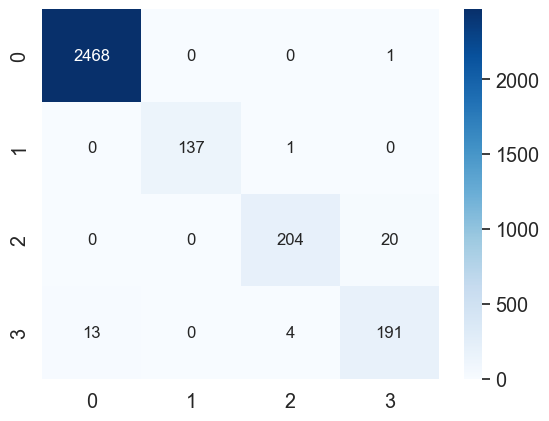

              precision    recall  f1-score   support

 #people = 0       0.99      1.00      1.00      2469
 #people = 1       1.00      0.99      1.00       138
 #people = 2       0.98      0.91      0.94       224
 #people = 3       0.90      0.92      0.91       208

    accuracy                           0.99      3039
   macro avg       0.97      0.96      0.96      3039
weighted avg       0.99      0.99      0.99      3039



/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


> L1 Regularization: 
3039
(3039, 1)


/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


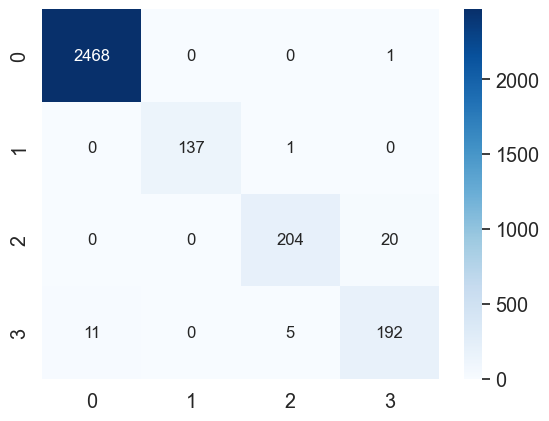

              precision    recall  f1-score   support

 #people = 0       1.00      1.00      1.00      2469
 #people = 1       1.00      0.99      1.00       138
 #people = 2       0.97      0.91      0.94       224
 #people = 3       0.90      0.92      0.91       208

    accuracy                           0.99      3039
   macro avg       0.97      0.96      0.96      3039
weighted avg       0.99      0.99      0.99      3039



In [204]:
X_train = pd.read_csv("data/original/original_x_train.csv") 
X_test = pd.read_csv("data/original/original_x_test.csv")
y_train = pd.read_csv("data/original/original_y_train.csv")
y_test = pd.read_csv("data/original/original_y_test.csv")

data_main = [X_train, X_test, y_train, y_test]

sklearn_LR(data_main)
sklearn_LR(data_main, regu='l1')

# Potential modifications to the existing dataset and task: 

Describe any modifications you made to the general problem definition. For instance, if you only focused on a specific set of features, or you turned a classification problem to regression or vice-versa, state it here.

# Preprocessing: 

Describe any preprocessing, including normalization, feature selection, representation learning, sampling/sketching, etc.

### z-normalization

z = (x - u) / s

u: mean,  
s: std dev

/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


> L2 Regularization: 
3039
(3039, 1)


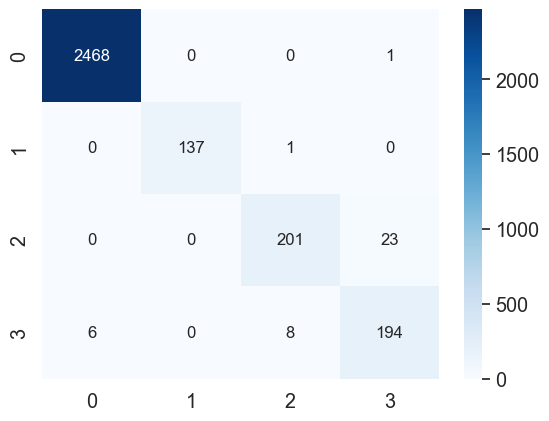

              precision    recall  f1-score   support

 #people = 0       1.00      1.00      1.00      2469
 #people = 1       1.00      0.99      1.00       138
 #people = 2       0.96      0.90      0.93       224
 #people = 3       0.89      0.93      0.91       208

    accuracy                           0.99      3039
   macro avg       0.96      0.96      0.96      3039
weighted avg       0.99      0.99      0.99      3039



/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expec

{'fit_time': array([1.01120806, 1.01559496, 1.00250387, 1.01894712, 1.01797485,
       1.018116  , 1.01425505, 0.98488092, 0.99092793, 0.97178984]), 'score_time': array([0.00226903, 0.00195622, 0.00157309, 0.00131011, 0.00132012,
       0.00124598, 0.00145221, 0.00140023, 0.00127912, 0.00231123]), 'test_f1_score': array([0.97272771, 0.97972035, 0.97668339, 0.96951494, 0.96781549,
       0.98111415, 0.96520941, 0.97056983, 0.97768627, 0.94636618])}


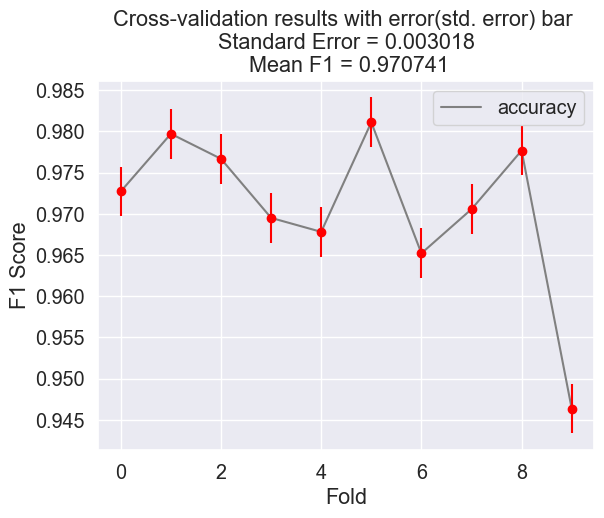

/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


> L1 Regularization: 
3039
(3039, 1)


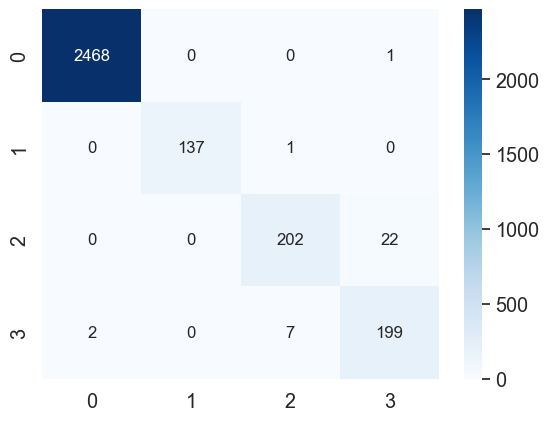

              precision    recall  f1-score   support

 #people = 0       1.00      1.00      1.00      2469
 #people = 1       1.00      0.99      1.00       138
 #people = 2       0.96      0.90      0.93       224
 #people = 3       0.90      0.96      0.93       208

    accuracy                           0.99      3039
   macro avg       0.96      0.96      0.96      3039
weighted avg       0.99      0.99      0.99      3039



/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expec

{'fit_time': array([5.98118401, 5.99408007, 6.31202579, 6.40112901, 6.08510208,
       6.24996495, 6.14084888, 5.90265393, 6.53602099, 6.19450498]), 'score_time': array([0.00350118, 0.00282288, 0.00142813, 0.0009141 , 0.00159001,
       0.00177693, 0.00228286, 0.00307322, 0.00134802, 0.00138783]), 'test_f1_score': array([0.9779852 , 0.98196787, 0.97515994, 0.9728897 , 0.97344958,
       0.97911384, 0.96772292, 0.97056983, 0.97768627, 0.94800091])}


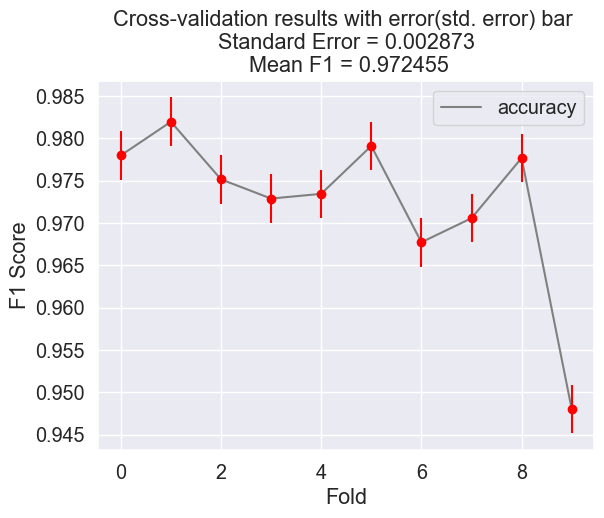

In [101]:
from sklearn import preprocessing
data_scaled = data.copy()
data_scaled.iloc[:,:-1] = preprocessing.StandardScaler().fit_transform(data_scaled.iloc[:,:-1])

X_train_z, X_test_z, y_train_z, y_test_z = train_test_split(data_scaled.iloc[:,:-1], data_scaled.iloc[:,-1:], test_size=0.3, random_state=seed, stratify=lbls)


X_train_z.to_csv("data/zNorm/X_train.csv", index=False)
X_test_z.to_csv("data/zNorm/X_test.csv", index=False)
y_train_z.to_csv("data/zNorm/y_train.csv", index=False)
y_test_z.to_csv("data/zNorm/y_test.csv", index=False)

data_z = [X_train_z, X_test_z, y_train_z, y_test_z]

sklearn_LR(data_z)
sklearn_LR(data_z, regu='l1')


### Min-Max Normalization

/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


> L2 Regularization: 
3039
(3039, 1)


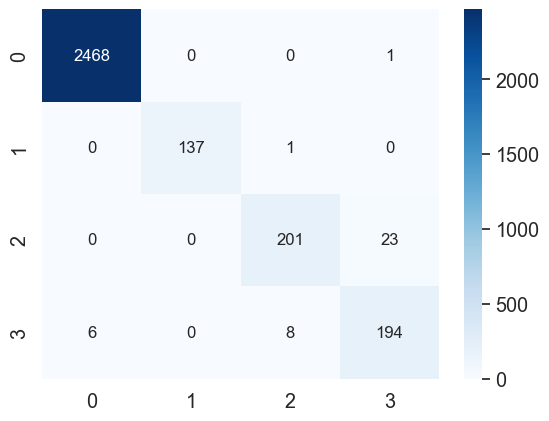

              precision    recall  f1-score   support

 #people = 0       1.00      1.00      1.00      2469
 #people = 1       1.00      0.99      1.00       138
 #people = 2       0.96      0.90      0.93       224
 #people = 3       0.89      0.93      0.91       208

    accuracy                           0.99      3039
   macro avg       0.96      0.96      0.96      3039
weighted avg       0.99      0.99      0.99      3039



/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expec

{'fit_time': array([1.03028178, 1.03330398, 1.00794911, 1.05587101, 1.05989814,
       1.05766296, 1.05476308, 1.05890298, 1.06349277, 1.0358882 ]), 'score_time': array([0.0028162 , 0.00324512, 0.00268793, 0.00238419, 0.00148773,
       0.00242186, 0.00163412, 0.00162196, 0.0016911 , 0.00422692]), 'test_f1_score': array([0.97272771, 0.97972035, 0.97668339, 0.96951494, 0.96781549,
       0.98111415, 0.96520941, 0.97056983, 0.97768627, 0.94636618])}


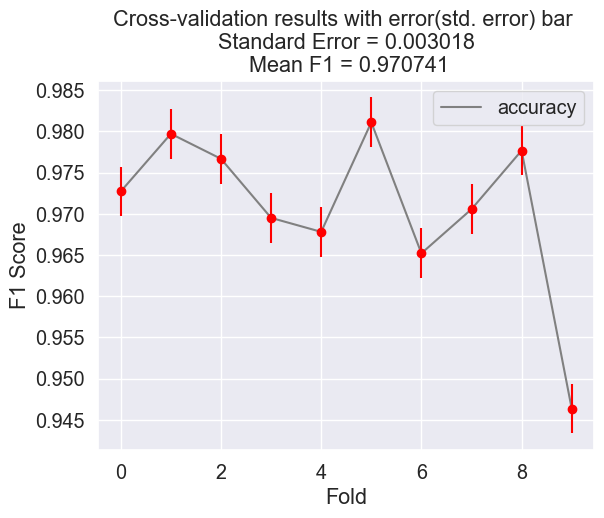

/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


> L1 Regularization: 
3039
(3039, 1)


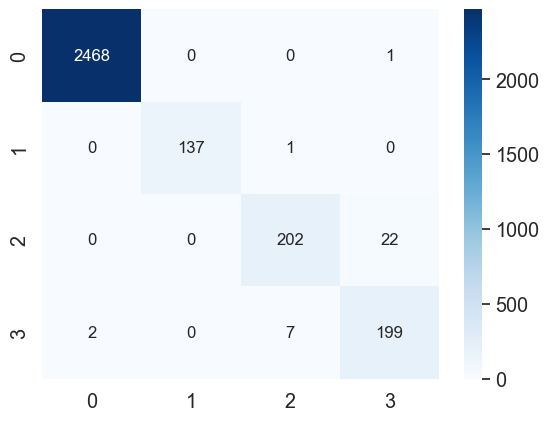

              precision    recall  f1-score   support

 #people = 0       1.00      1.00      1.00      2469
 #people = 1       1.00      0.99      1.00       138
 #people = 2       0.96      0.90      0.93       224
 #people = 3       0.90      0.96      0.93       208

    accuracy                           0.99      3039
   macro avg       0.96      0.96      0.96      3039
weighted avg       0.99      0.99      0.99      3039



/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expec

{'fit_time': array([6.15618467, 6.13341808, 6.46719694, 6.53152204, 6.31377006,
       6.40529418, 6.33900213, 6.13818288, 6.66328788, 6.34932184]), 'score_time': array([0.00251126, 0.00218892, 0.00143099, 0.00087905, 0.00156498,
       0.00115895, 0.0014019 , 0.00200915, 0.00088811, 0.00087214]), 'test_f1_score': array([0.9779852 , 0.98196787, 0.97515994, 0.9728897 , 0.97344958,
       0.97911384, 0.96772292, 0.97056983, 0.97768627, 0.94800091])}


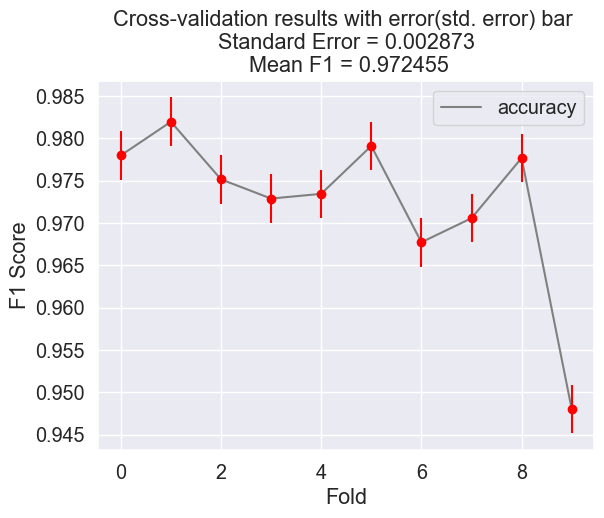

/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expec

{'fit_time': array([0.50559807, 0.48949671, 0.51552582, 0.5121429 , 0.51608205,
       0.50792193, 0.52431488, 0.52352905, 0.50453496, 0.47983193]), 'score_time': array([0.00374603, 0.00413918, 0.00407195, 0.0035429 , 0.00261879,
       0.00275207, 0.00292301, 0.00236177, 0.00267816, 0.00257921]), 'test_f1_score': array([0.98452381, 0.98181753, 0.98295637, 1.        , 0.98611208,
       0.9739551 , 0.98657275, 0.98843427, 0.97739121, 0.96452296])}


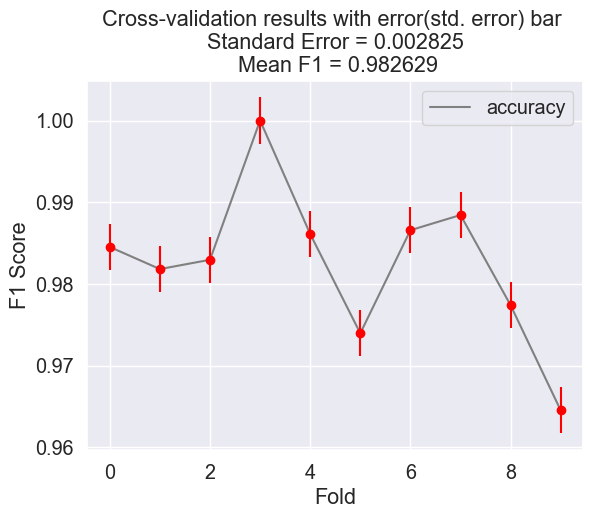

0.9826286069623679

In [102]:
from sklearn.preprocessing import MinMaxScaler
data_scaled_m = data.copy()
data_scaled_m.iloc[:,:-1] = preprocessing.StandardScaler().fit_transform(data_scaled_m.iloc[:,:-1])

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(data_scaled_m.iloc[:,:-1], data_scaled_m.iloc[:,-1:], test_size=0.3, random_state=seed, stratify=lbls)


X_train_m.to_csv("data/mNorm/X_train.csv", index=False)
X_test_m.to_csv("data/mNorm/X_test.csv", index=False)
y_train_m.to_csv("data/mNorm/y_train.csv", index=False)
y_test_m.to_csv("data/mNorm/y_test.csv", index=False)

data_m = [X_train_m, X_test_m, y_train_m, y_test_m]

sklearn_LR(data_m)
sklearn_LR(data_m, regu='l1')

cv_score(model, data_scaled_m.iloc[:,:-1], data_scaled_m.iloc[:,-1:])

# Experimental setting: 
Describe the exact set-up of your experimental evaluation. What metrics did you use and why, how were the results you are presenting computed (did you do cross-validation?) etc.

# Results: 
Here you should include tables/figures that show the performance of your chosen baseline across the chosen performance metrics. Please make sure you include error-bars in any plot, or $\pm$ standard deviation in any table, as we discussed in class.

# Feature Selection

<AxesSubplot:>

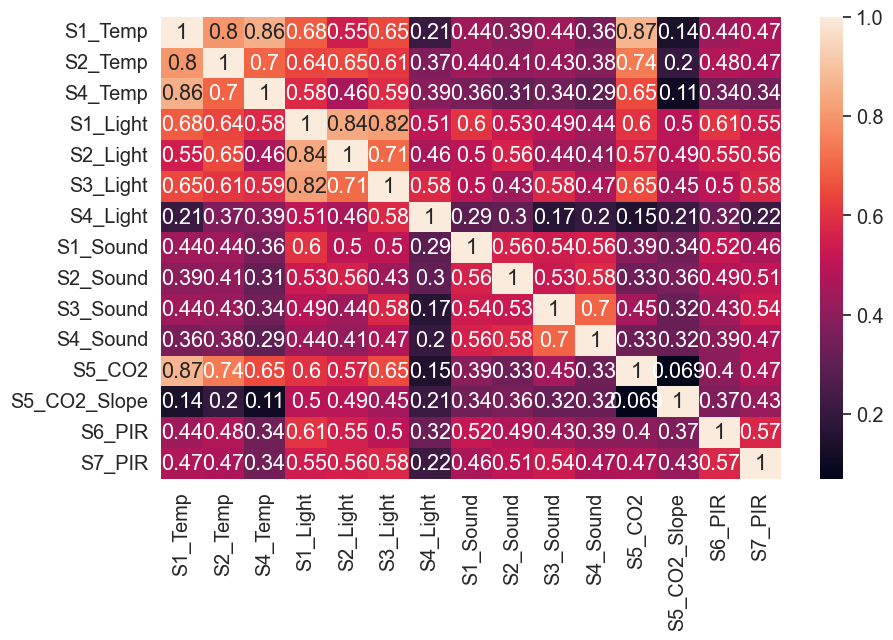

In [207]:
plt.figure(figsize=(10,6))
sns.heatmap(X.corr(), annot=True)

In [ ]:
col_drop = ['S3_Temp']
X = X.drop(col_drop, axis=1)


<AxesSubplot:>

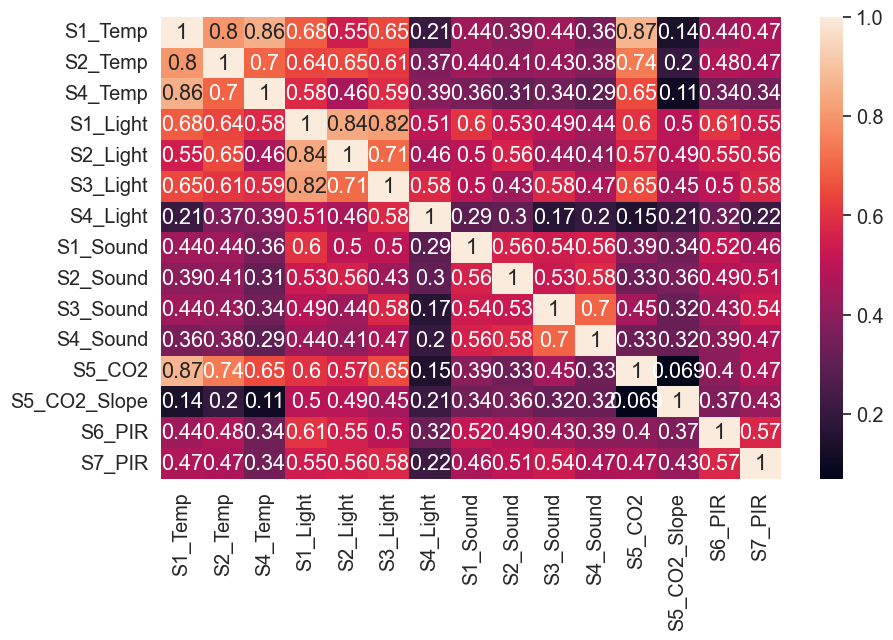

In [209]:
plt.figure(figsize=(10,6))
sns.heatmap(X.corr(), annot=True)

In [210]:
data_main[0] = data_main[0].drop(col_drop, axis=1)
data_main[1] = data_main[1].drop(col_drop, axis=1)

/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


> L2 Regularization: 
3039
(3039, 1)


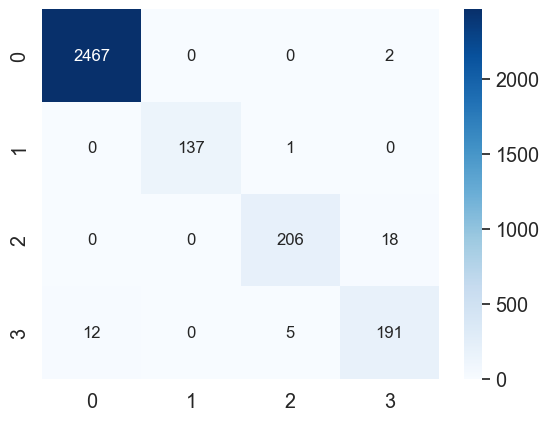

              precision    recall  f1-score   support

 #people = 0       1.00      1.00      1.00      2469
 #people = 1       1.00      0.99      1.00       138
 #people = 2       0.97      0.92      0.94       224
 #people = 3       0.91      0.92      0.91       208

    accuracy                           0.99      3039
   macro avg       0.97      0.96      0.96      3039
weighted avg       0.99      0.99      0.99      3039



/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


> L1 Regularization: 
3039
(3039, 1)


/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


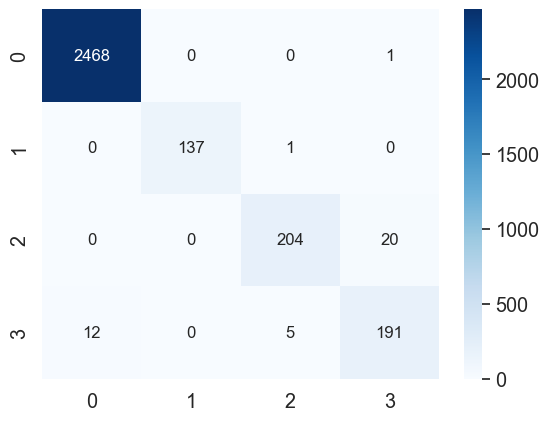

              precision    recall  f1-score   support

 #people = 0       1.00      1.00      1.00      2469
 #people = 1       1.00      0.99      1.00       138
 #people = 2       0.97      0.91      0.94       224
 #people = 3       0.90      0.92      0.91       208

    accuracy                           0.99      3039
   macro avg       0.97      0.96      0.96      3039
weighted avg       0.99      0.99      0.99      3039



In [211]:
sklearn_LR(data_main)
sklearn_LR(data_main, regu='l1')

(7090, 15)

# Feature Representation Techniques

## 1. Principal Component Analysis (PCA)

In [103]:
from sklearn.decomposition import PCA

In [104]:
scaled_x = data_scaled.iloc[:,:-1]
scaled_x.shape

(10129, 16)

In [105]:
pca = PCA()
pca_data = pca.fit_transform(scaled_x)

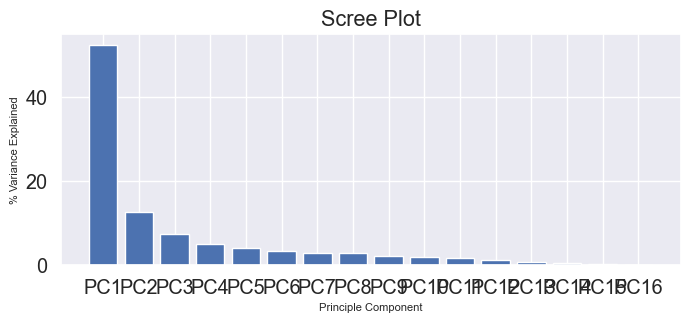

In [106]:
# Scree Plot
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
labels = ['PC'+ str(x) for x in range(1,len(per_var)+1)]
plt.figure(figsize=(8,3))
plt.bar(x=labels,height=per_var)
plt.ylabel('% Variance Explained', fontsize=8)
plt.xlabel('Principle Component', fontsize=8)
plt.title('Scree Plot')
plt.show()

From PCA % variance explained, we see the first two component can explain well (more than 60%). 

Text(0.5, 1.0, 'PCA feature representation with 2 dimension')

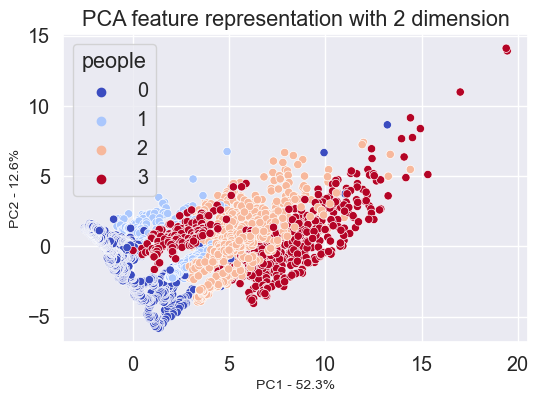

In [216]:
# n_components = 2
pca1 = PCA(n_components = 2)
pca_model = pca1.fit(scaled_x)
pca1_x = pca1.fit_transform(scaled_x)

# create dataframe using the PC components
pca1_df = pd.DataFrame(data = pca1_x, columns = ['PC1', 'PC2'])
pca1_df['people'] = lbls
pca1_df.head()

# Vizualize PCA
plt.figure(figsize=(6, 4))
sns.scatterplot(data=pca1_df, x="PC1", y="PC2", hue="people", legend="full",palette="coolwarm")
plt.xlabel('PC1 - {}%'.format(per_var[0]), fontsize=10)
plt.ylabel('PC2 - {}%'.format(per_var[1]), fontsize=10)
plt.title("PCA feature representation with 2 dimension")

In [ ]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(pca1_df.iloc[:,:-1], pca1_df.iloc[:,-1:], test_size=0.3, random_state=seed, stratify=lbls)


# X_train_m.to_csv("data/mNorm/X_train.csv", index=False)
# X_test_m.to_csv("data/mNorm/X_test.csv", index=False)
# y_train_m.to_csv("data/mNorm/y_train.csv", index=False)
# y_test_m.to_csv("data/mNorm/y_test.csv", index=False)

pca1_data = [X_train_m, X_test_m, y_train_m, y_test_m]


sklearn_LR(pca1_data)
sklearn_LR(pca1_data,  regu='l1')

In [107]:
# n_components = 10
pca_ = PCA(n_components = 10)
pca_model_ = pca_.fit(scaled_x)
pca_data_ = pca_.fit_transform(scaled_x)

# create dataframe using the PC components
pca_df_ = pd.DataFrame(data = pca_data_)
pca_df_['people'] = lbls

> L2 Regularization: 
> L2 Regularization: 
3039
(3039, 1)


/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


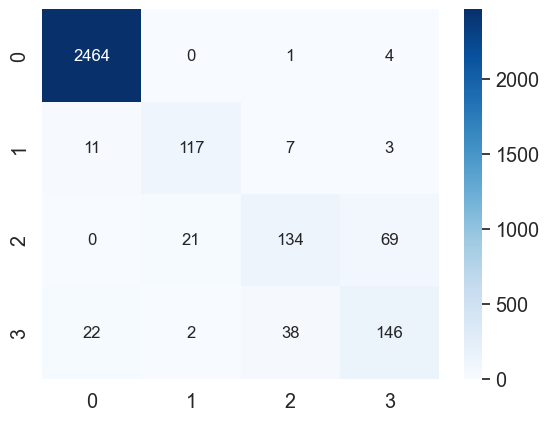

              precision    recall  f1-score   support

 #people = 0       0.99      1.00      0.99      2469
 #people = 1       0.84      0.85      0.84       138
 #people = 2       0.74      0.60      0.66       224
 #people = 3       0.66      0.70      0.68       208

    accuracy                           0.94      3039
   macro avg       0.81      0.79      0.79      3039
weighted avg       0.94      0.94      0.94      3039



/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expec

{'fit_time': array([0.28060412, 0.28861499, 0.28401089, 0.27462697, 0.2905519 ,
       0.28242683, 0.28006101, 0.27527308, 0.24843502, 0.22858071]), 'score_time': array([0.00229478, 0.00139809, 0.00152612, 0.00205803, 0.00125623,
       0.00126529, 0.00118399, 0.00122786, 0.00144982, 0.00141907]), 'test_f1_score': array([0.82721296, 0.77125929, 0.8097288 , 0.80609336, 0.80791859,
       0.75564363, 0.74406703, 0.81295659, 0.80158137, 0.79927255])}


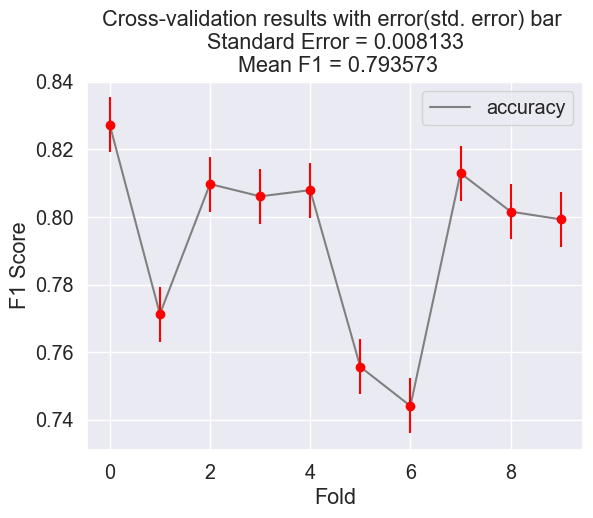

> L1 Regularization: 
> L1 Regularization: 
3039
(3039, 1)


/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


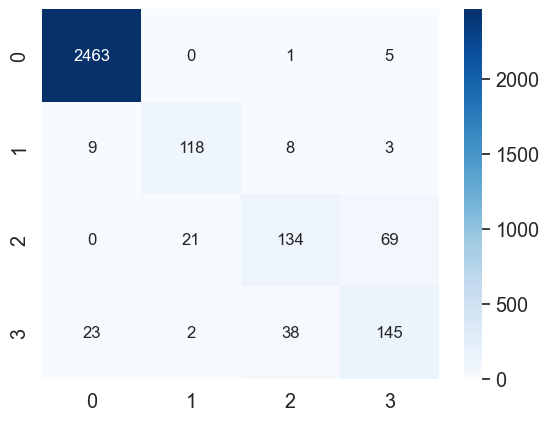

              precision    recall  f1-score   support

 #people = 0       0.99      1.00      0.99      2469
 #people = 1       0.84      0.86      0.85       138
 #people = 2       0.74      0.60      0.66       224
 #people = 3       0.65      0.70      0.67       208

    accuracy                           0.94      3039
   macro avg       0.80      0.79      0.79      3039
weighted avg       0.94      0.94      0.94      3039



/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expec

{'fit_time': array([0.3617301 , 0.37265325, 0.36434007, 0.38331509, 0.36539984,
       0.37111783, 0.36574531, 0.37298799, 0.36069608, 0.30842614]), 'score_time': array([0.00187898, 0.00126791, 0.00172782, 0.00118089, 0.00130486,
       0.00117517, 0.00133872, 0.00125694, 0.00111222, 0.00120568]), 'test_f1_score': array([0.82607583, 0.77125929, 0.81017752, 0.80172708, 0.80791859,
       0.76052244, 0.74406703, 0.82054405, 0.80158137, 0.80174084])}


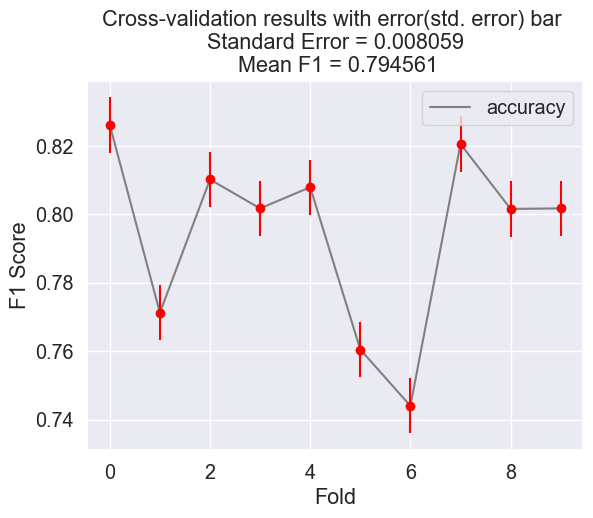

In [108]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(pca_df_.iloc[:,:-1], pca_df_.iloc[:,-1:], test_size=0.3, random_state=seed, stratify=lbls)


X_train_m.to_csv("data/pca/X_train.csv", index=False)
X_test_m.to_csv("data/pca/X_test.csv", index=False)
y_train_m.to_csv("data/pca/y_train.csv", index=False)
y_test_m.to_csv("data/pca/y_test.csv", index=False)

pca2_data = [X_train_m, X_test_m, y_train_m, y_test_m]

print("> L2 Regularization: ")
sklearn_LR(pca2_data)
print("> L1 Regularization: ")
sklearn_LR(pca2_data, regu='l1')

## 2. LDA

In [109]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Text(0.5, 1.0, 'LDA feature representation with 2 dimension')

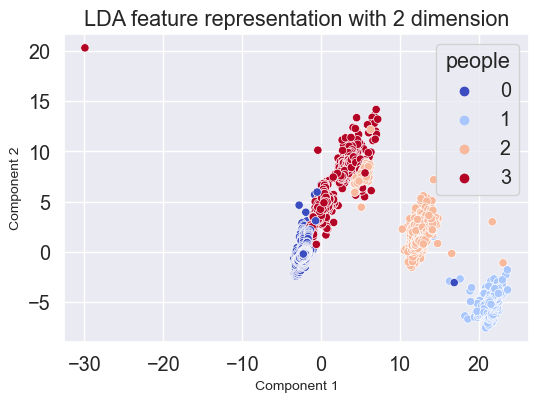

In [110]:
# n_components = 2
lda = LinearDiscriminantAnalysis(n_components = 2)
lda_model = lda.fit(scaled_x, lbls)
lda_x = lda_model.transform(scaled_x)

# create dataframe using the PC components
lda_df = pd.DataFrame(data = lda_x, columns = ['Com1', 'Com2'])
lda_df['people'] = lbls

# Vizualize 
plt.figure(figsize=(6, 4))
sns.scatterplot(data=lda_df, x="Com1", y="Com2", hue="people", legend="full",palette="coolwarm")
plt.xlabel('Component 1', fontsize=10)
plt.ylabel('Component 2', fontsize=10)
plt.title("LDA feature representation with 2 dimension")

> L2 Regularization: 
> L2 Regularization: 
3039
(3039, 1)


/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


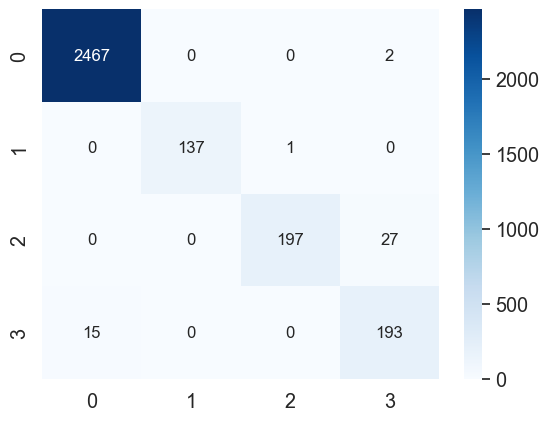

              precision    recall  f1-score   support

 #people = 0       0.99      1.00      1.00      2469
 #people = 1       1.00      0.99      1.00       138
 #people = 2       0.99      0.88      0.93       224
 #people = 3       0.87      0.93      0.90       208

    accuracy                           0.99      3039
   macro avg       0.96      0.95      0.96      3039
weighted avg       0.99      0.99      0.99      3039

{'fit_time': array([0.03748989, 0.03914809, 0.03624892, 0.04139233, 0.04093313,
       0.04203391, 0.03993011, 0.04098511, 0.03853202, 0.03128195]), 'score_time': array([0.00181293, 0.00196815, 0.00178814, 0.0015018 , 0.00217795,
       0.00221014, 0.00136876, 0.00114894, 0.00120878, 0.00117707]), 'test_f1_score': array([0.95555142, 0.96626679, 0.96346676, 0.97080789, 0.95297433,
       0.96867976, 0.96640892, 0.96044057, 0.95906695, 0.93844064])}


/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expec

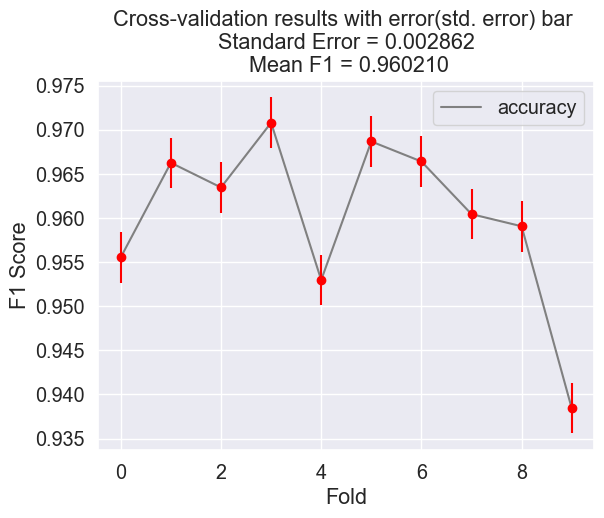

> L1 Regularization: 
> L1 Regularization: 
3039
(3039, 1)


/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


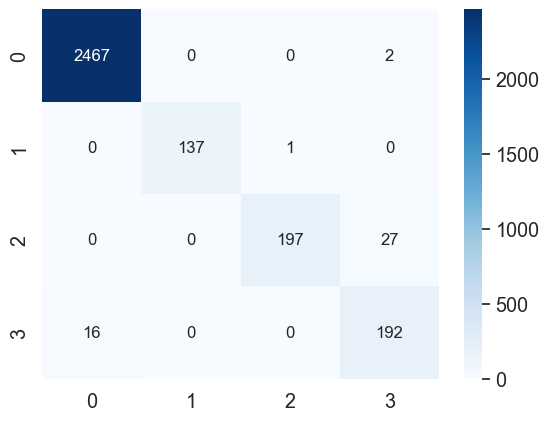

              precision    recall  f1-score   support

 #people = 0       0.99      1.00      1.00      2469
 #people = 1       1.00      0.99      1.00       138
 #people = 2       0.99      0.88      0.93       224
 #people = 3       0.87      0.92      0.90       208

    accuracy                           0.98      3039
   macro avg       0.96      0.95      0.96      3039
weighted avg       0.99      0.98      0.98      3039

{'fit_time': array([0.060642  , 0.05397296, 0.06651306, 0.06567788, 0.06453991,
       0.06120539, 0.05707026, 0.06093001, 0.06151485, 0.0503211 ]), 'score_time': array([0.00137401, 0.00146389, 0.00102687, 0.00095201, 0.00135708,
       0.0011847 , 0.00190282, 0.00081396, 0.0008049 , 0.00082493]), 'test_f1_score': array([0.96053656, 0.96395643, 0.96346676, 0.96886639, 0.95297433,
       0.97202913, 0.96640892, 0.95933854, 0.96578465, 0.93844064])}


/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expec

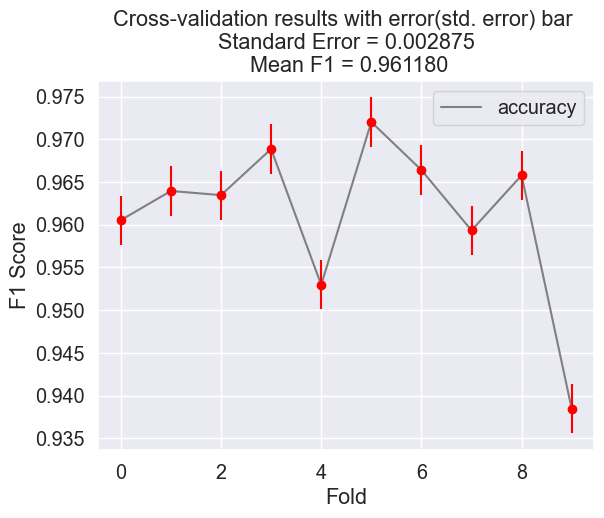

In [111]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(lda_df.iloc[:,:-1], lda_df.iloc[:,-1:], test_size=0.3, random_state=seed, stratify=lbls)


X_train_m.to_csv("data/lda/X_train.csv", index=False)
X_test_m.to_csv("data/lda/X_test.csv", index=False)
y_train_m.to_csv("data/lda/y_train.csv", index=False)
y_test_m.to_csv("data/lda/y_test.csv", index=False)

lda_data = [X_train_m, X_test_m, y_train_m, y_test_m]

print("> L2 Regularization: ")
sklearn_LR(lda_data)
print("> L1 Regularization: ")
sklearn_LR(lda_data, regu='l1')

## 3. t-SNE

In [112]:
from sklearn.manifold import TSNE

/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10129 samples in 0.000s...
[t-SNE] Computed neighbors for 10129 samples in 2.392s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10129
[t-SNE] Computed conditional probabilities for sample 2000 / 10129
[t-SNE] Computed conditional probabilities for sample 3000 / 10129
[t-SNE] Computed conditional probabilities for sample 4000 / 10129
[t-SNE] Computed conditional probabilities for sample 5000 / 10129
[t-SNE] Computed conditional probabilities for sample 6000 / 10129
[t-SNE] Computed conditional probabilities for sample 7000 / 10129
[t-SNE] Computed conditional probabilities for sample 8000 / 10129
[t-SNE] Computed conditional probabilities for sample 9000 / 10129
[t-SNE] Computed conditional probabilities for sample 10000 / 10129
[t-SNE] Computed conditional probabilities for sample 10129 / 10129
[t-SNE] Mean sigma: 0.080502
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.973656
[t-SNE] KL 

Text(0.5, 1.0, 't-SNE feature representation with 2 dimension')

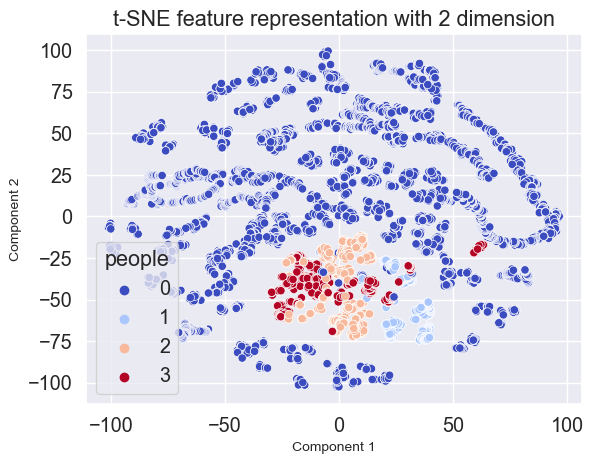

In [113]:
# n_components = 2
tsne = TSNE(n_components=2, verbose=1, random_state=123)
tsne_x = tsne.fit_transform(scaled_x) 

# create dataframe using the generated features
tsne_df = pd.DataFrame(data = tsne_x, columns = ['Com1', 'Com2'])
tsne_df['people'] = lbls

# Vizualize 
sns.scatterplot(data=tsne_df, x="Com1", y="Com2", hue="people", legend="full",palette="coolwarm")
plt.xlabel('Component 1', fontsize=10)
plt.ylabel('Component 2', fontsize=10)
plt.title("t-SNE feature representation with 2 dimension")


> L2 Regularization: 
> L2 Regularization: 
3039
(3039, 1)


/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/me

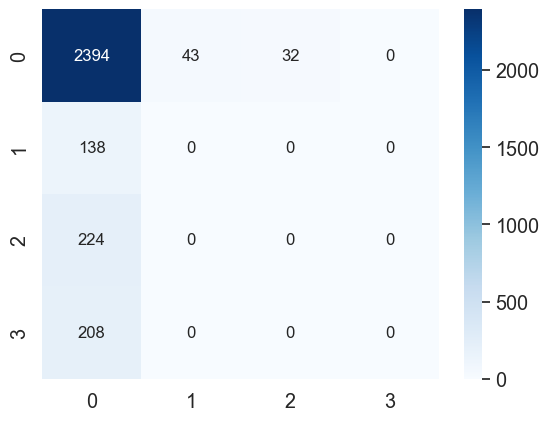

              precision    recall  f1-score   support

 #people = 0       0.81      0.97      0.88      2469
 #people = 1       0.00      0.00      0.00       138
 #people = 2       0.00      0.00      0.00       224
 #people = 3       0.00      0.00      0.00       208

    accuracy                           0.79      3039
   macro avg       0.20      0.24      0.22      3039
weighted avg       0.66      0.79      0.72      3039

{'fit_time': array([0.05676413, 0.05566287, 0.05267906, 0.05837393, 0.062186  ,
       0.05823493, 0.06160498, 0.05690002, 0.05251408, 0.04521585]), 'score_time': array([0.00175691, 0.00226617, 0.00774097, 0.00218105, 0.0022521 ,
       0.00156498, 0.00131297, 0.00126886, 0.00149488, 0.00134921]), 'test_f1_score': array([0.21892342, 0.22047461, 0.21892342, 0.21876735, 0.21923503,
       0.21907931, 0.22216127, 0.21985619, 0.2184547 , 0.21997786])}


/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expec

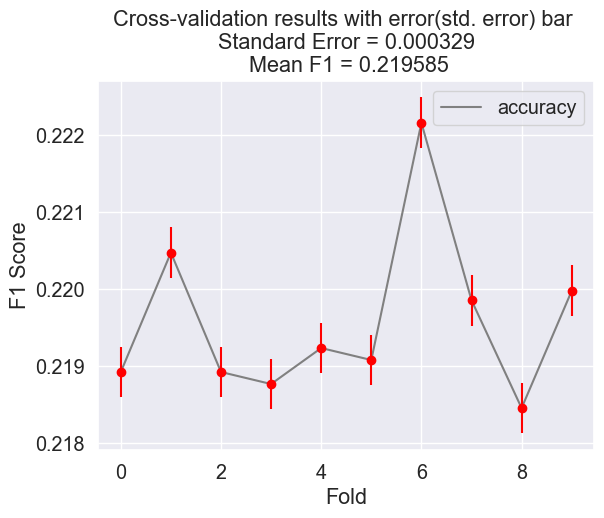

> L1 Regularization: 
> L1 Regularization: 
3039
(3039, 1)


/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/me

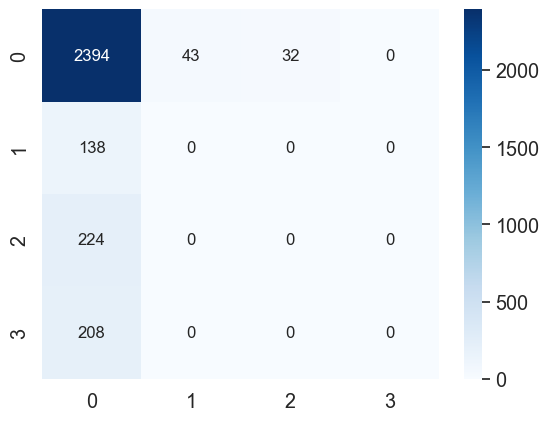

              precision    recall  f1-score   support

 #people = 0       0.81      0.97      0.88      2469
 #people = 1       0.00      0.00      0.00       138
 #people = 2       0.00      0.00      0.00       224
 #people = 3       0.00      0.00      0.00       208

    accuracy                           0.79      3039
   macro avg       0.20      0.24      0.22      3039
weighted avg       0.66      0.79      0.72      3039

{'fit_time': array([0.03200984, 0.03864908, 0.04137969, 0.0473578 , 0.04554701,
       0.0374949 , 0.03728104, 0.03588605, 0.03311586, 0.03756523]), 'score_time': array([0.00217319, 0.00205898, 0.00257206, 0.00119424, 0.00121379,
       0.00121093, 0.00120401, 0.00119305, 0.00123215, 0.00118589]), 'test_f1_score': array([0.21876735, 0.22047461, 0.21892342, 0.21876735, 0.21923503,
       0.21907931, 0.22216127, 0.21985619, 0.2184547 , 0.21997786])}


/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expec

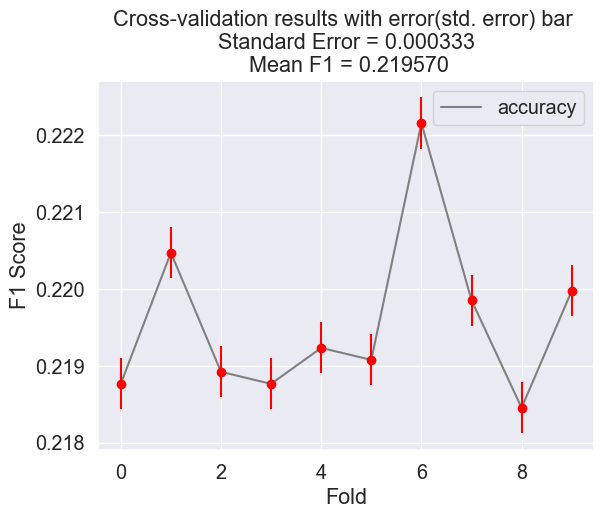

In [114]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(tsne_df.iloc[:,:-1], tsne_df.iloc[:,-1:], test_size=0.3, random_state=seed, stratify=lbls)


X_train_m.to_csv("data/tsne/X_train.csv", index=False)
X_test_m.to_csv("data/tsne/X_test.csv", index=False)
y_train_m.to_csv("data/tsne/y_train.csv", index=False)
y_test_m.to_csv("data/tsne/y_test.csv", index=False)

tsne_data = [X_train_m, X_test_m, y_train_m, y_test_m]


print("> L2 Regularization: ")
sklearn_LR(tsne_data)
print("> L1 Regularization: ")
sklearn_LR(tsne_data, regu='l1')

## Factor Analysis

In [115]:
from sklearn.decomposition import FactorAnalysis

Text(0.5, 1.0, 'Factor Analysis feature representation with 2 dimension')

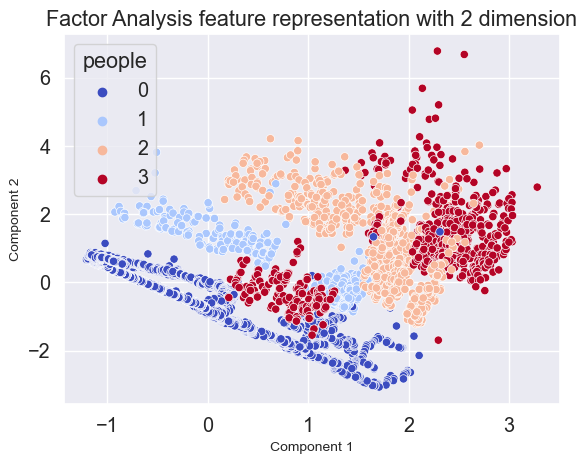

In [226]:
# n_components =2 
FA = FactorAnalysis(n_components=2, random_state=0)
fa_model = FA.fit(scaled_x)
fa_x = FA.fit_transform(scaled_x)

# create dataframe using the generated features
fa_df = pd.DataFrame(data = fa_x, columns = ['Com1', 'Com2'])
fa_df['people'] = lbls

# Vizualize 
sns.scatterplot(data=fa_df, x="Com1", y="Com2", hue="people", legend="full",palette="coolwarm")
plt.xlabel('Component 1', fontsize=10)
plt.ylabel('Component 2', fontsize=10)
plt.title("Factor Analysis feature representation with 2 dimension")

In [ ]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(fa_df.iloc[:,:-1], fa_df.iloc[:,-1:], test_size=0.3, random_state=seed, stratify=lbls)


# X_train_m.to_csv("data/fa/X_train.csv", index=False)
# X_test_m.to_csv("data/fa/X_test.csv", index=False)
# y_train_m.to_csv("data/fa/y_train.csv", index=False)
# y_test_m.to_csv("data/fa/y_test.csv", index=False)

fa_data = [X_train_m, X_test_m, y_train_m, y_test_m]

print("> L2 Regularization: ")
sklearn_LR(fa_data)
print("> L1 Regularization: ")
sklearn_LR(fa_data, regu='l1')


> L2 Regularization: 
> L2 Regularization: 
3039
(3039, 1)


/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


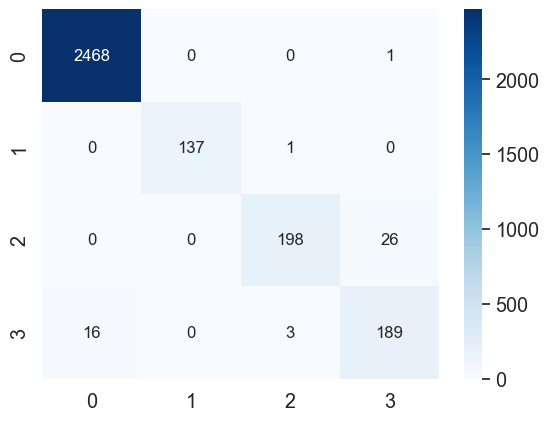

              precision    recall  f1-score   support

 #people = 0       0.99      1.00      1.00      2469
 #people = 1       1.00      0.99      1.00       138
 #people = 2       0.98      0.88      0.93       224
 #people = 3       0.88      0.91      0.89       208

    accuracy                           0.98      3039
   macro avg       0.96      0.95      0.95      3039
weighted avg       0.98      0.98      0.98      3039



/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expec

{'fit_time': array([0.12066412, 0.16684985, 0.16598415, 0.19011617, 0.19107389,
       0.18805456, 0.18085194, 0.17148495, 0.15630388, 0.15654135]), 'score_time': array([0.00158477, 0.00198126, 0.00131083, 0.0021131 , 0.00225091,
       0.0013082 , 0.00167298, 0.00128722, 0.00121903, 0.00119495]), 'test_f1_score': array([0.9552621 , 0.96464582, 0.96894811, 0.96028443, 0.95658747,
       0.96351554, 0.96385392, 0.96632913, 0.96071529, 0.94197894])}


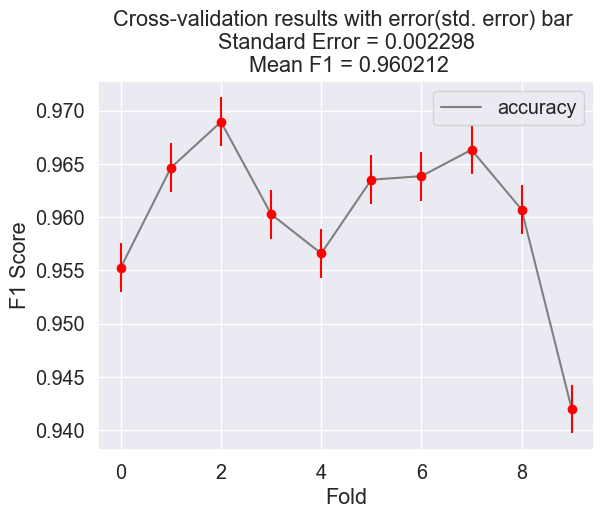

> L1 Regularization: 
> L1 Regularization: 
3039
(3039, 1)


/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


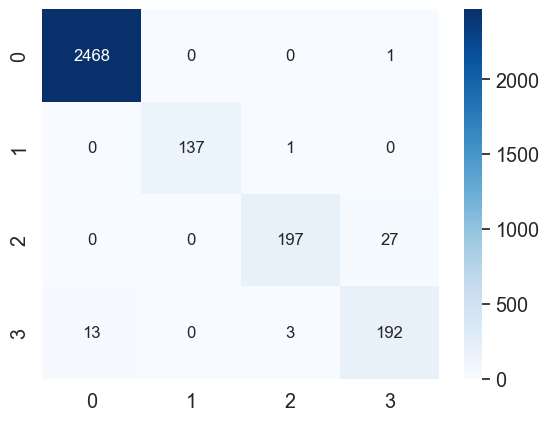

              precision    recall  f1-score   support

 #people = 0       0.99      1.00      1.00      2469
 #people = 1       1.00      0.99      1.00       138
 #people = 2       0.98      0.88      0.93       224
 #people = 3       0.87      0.92      0.90       208

    accuracy                           0.99      3039
   macro avg       0.96      0.95      0.95      3039
weighted avg       0.99      0.99      0.99      3039



/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faisal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expec

{'fit_time': array([0.66659403, 0.62392807, 0.65188098, 0.65063977, 0.64183807,
       0.63191986, 0.65268302, 0.64681983, 0.5956862 , 0.65652418]), 'score_time': array([0.0013032 , 0.00210905, 0.00174093, 0.00111699, 0.00196195,
       0.00196004, 0.00107098, 0.00104499, 0.00280499, 0.00092888]), 'test_f1_score': array([0.95724743, 0.96464582, 0.96894811, 0.96028443, 0.95871823,
       0.96734136, 0.96640892, 0.96832334, 0.95391341, 0.94393069])}


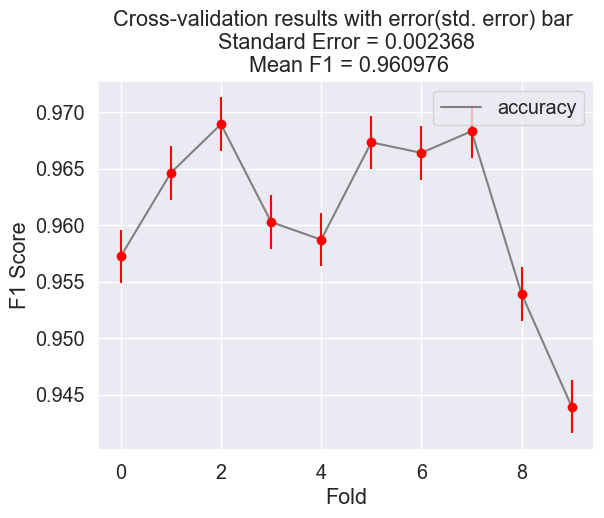

In [116]:
# n_components = 10
FA3 = FactorAnalysis(n_components=10, random_state=0)
fa_model3 = FA3.fit(scaled_x)
fa_x3 = FA3.fit_transform(scaled_x)

# create dataframe using the generated features
fa_df3 = pd.DataFrame(data = fa_x3)
fa_df3['people'] = lbls



X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(fa_df3.iloc[:,:-1], fa_df3.iloc[:,-1:], test_size=0.3, random_state=seed, stratify=lbls)


X_train_m.to_csv("data/fa/X_train.csv", index=False)
X_test_m.to_csv("data/fa/X_test.csv", index=False)
y_train_m.to_csv("data/fa/y_train.csv", index=False)
y_test_m.to_csv("data/fa/y_test.csv", index=False)

fa_data = [X_train_m, X_test_m, y_train_m, y_test_m]

print("> L2 Regularization: ")
sklearn_LR(fa_data)
print("> L1 Regularization: ")
sklearn_LR(fa_data, regu='l1')
